In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from ipywidgets import interact,interactive
from IPython.display import display

## Effect of Skin on pressure profile

In [3]:
# s = skin factor
# rs = radius of damaged zone
# ks = k*log(rs/rw)/(s+log(rs/rw))

In [4]:
k = float(input("enter valve of resrevoir rock permeabulity in md : "))
q = float(input("enter value of oil flow in standard bbl per day : "))
B0 = float(input("enter value of oil formation volume in bbl/STB : "))
viscosity = float(input("enter value of oil viscosity in cp : "))
h = float(input("enter value of thickness of reservoir in feet :"))
pe = float(input("enter value of reservoir boundary pressure in psi :"))
re = float(input("enter outer radius of reservoir in feet: "))
rw = float(input("enter wellbore radius in feet: "))

enter valve of resrevoir rock permeabulity in md : 120
enter value of oil flow in standard bbl per day : 600
enter value of oil formation volume in bbl/STB : 1.25
enter value of oil viscosity in cp : 2.5
enter value of thickness of reservoir in feet :25
enter value of reservoir boundary pressure in psi :2500
enter outer radius of reservoir in feet: 745
enter wellbore radius in feet: 0.25


In [5]:
r = np.linspace(rw,re,8000)

In [6]:
p_without_damage = pe - ((141.2*q*B0*viscosity*np.log(re/r))/(k*h))

In [7]:
p_without_damage

array([1794.02836536, 1821.96626233, 1843.1540199 , ..., 2499.97793939,
       2499.98897038, 2500.        ])

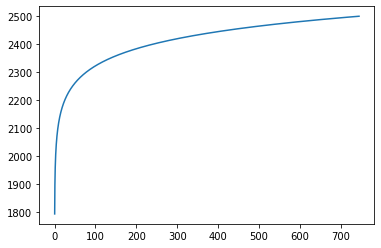

In [8]:
plt.plot(r,p_without_damage)

In [18]:
def skin_effect(s,rs):
    
    ks = (k*(np.log(rs/rw)))/(s+np.log(rs/rw))
    r_effectedzone = np.linspace(rw,rs,1000)
    
    p_damage = pe - (141.2*q*B0*viscosity*(((np.log(re/rs))/k)+(np.log(rs/r_effectedzone))/ks))/h
    
    plt.plot(r,p_without_damage,c="blue",label="Pressure profile of undamaged well")
    
    plt.plot(r_effectedzone,p_damage,c="red",label="Pressure profile of damaged zone")
    
    plt.xlim(0.3,50)
    plt.ylim(1000,2500)
    plt.xlabel("radius from wellbore")
    plt.ylabel("reservoir pressure")
    plt.legend()
    plt.title("Skin and skin zone effect on reservoir pressure drawdown")
    plt.grid(True)
    
    return r_effectedzone,r,p_damage,p_without_damage

(array([ 0.25      ,  0.26976977,  0.28953954,  0.30930931,  0.32907908,
         0.34884885,  0.36861862,  0.38838839,  0.40815816,  0.42792793,
         0.4476977 ,  0.46746747,  0.48723724,  0.50700701,  0.52677678,
         0.54654655,  0.56631632,  0.58608609,  0.60585586,  0.62562563,
         0.6453954 ,  0.66516517,  0.68493493,  0.7047047 ,  0.72447447,
         0.74424424,  0.76401401,  0.78378378,  0.80355355,  0.82332332,
         0.84309309,  0.86286286,  0.88263263,  0.9024024 ,  0.92217217,
         0.94194194,  0.96171171,  0.98148148,  1.00125125,  1.02102102,
         1.04079079,  1.06056056,  1.08033033,  1.1001001 ,  1.11986987,
         1.13963964,  1.15940941,  1.17917918,  1.19894895,  1.21871872,
         1.23848849,  1.25825826,  1.27802803,  1.2977978 ,  1.31756757,
         1.33733734,  1.35710711,  1.37687688,  1.39664665,  1.41641642,
         1.43618619,  1.45595596,  1.47572573,  1.4954955 ,  1.51526527,
         1.53503504,  1.5548048 ,  1.57457457,  1.5

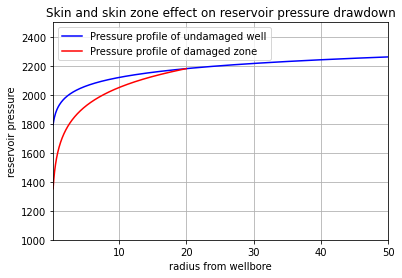

In [19]:
skin_effect(5,20)

In [20]:
skin_interactive = interactive(skin_effect,s=(-3,10,0.2),rs=(0.5,25,0.2))

In [21]:
skin_interactive

interactive(children=(FloatSlider(value=3.0, description='s', max=10.0, min=-3.0, step=0.2), FloatSlider(value…